# Perzeptron Lernalgorithmus 

## **1 - Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sklearn.datasets
import h5py
import scipy
from scipy import ndimage
from scipy.special import expit
from PIL import Image
from numpy import random
import pandas as pd

%matplotlib inline


## **2 - Dataset**

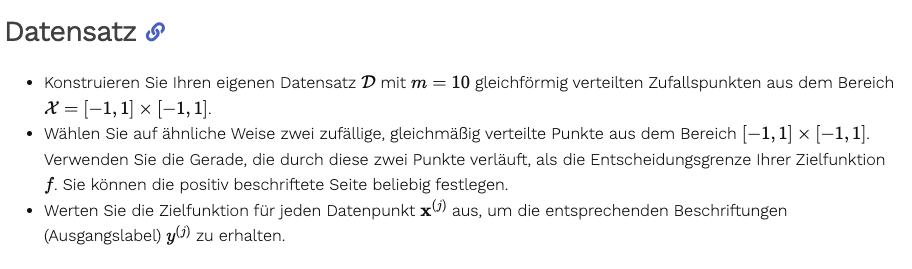

In [ ]:
# Generate the data points. 
# return X: array containing one data point per column : shape (2,m) 

def generate_points(m=10, seed=43):
    
    random.seed(seed)
    X = np.random.uniform(-1, 1, size=(m, 2))
    #print("Noktalar:\n",X)
    X = np.transpose(X)
    return X



In [ ]:
X = generate_points()
pd.DataFrame(X,index=['x1','x2'])

,0,1,2,3,4,5,6,7,8,9
x1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675
x2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449


In [ ]:
# Generate random decision boundary
# return w: weight vector representing decision boundary, of shape (3,1)
def random_boundary(seed=90):
    rng = np.random.RandomState(seed)

    # generate two random points A and B
    # sample = np.rng.standard_normal(size=(2,2))
    sample = rng.uniform(-1, 1, size=(2, 2))

    # calculate vector w
    x_values = sample[:,0]
    y_values = sample[:,1] 

    if x_values[1] ==  x_values[0]:
      w0 = - x_values[1] # egal, - x_values[0] ist also möglich
      w1 = 1
      w2 = 0
    elif y_values[1] == y_values[0] :
      w0 = - y_values[1]
      w1 = 0
      w2 = 1
    else : 
      m = (y_values[1] - y_values[0])/ (x_values[1] - x_values[0])
      w0 = -m*x_values[0] + y_values[0]
      w1 = m
      w2 = -1
      
    w = [w0, w1, w2]
    w = np.reshape(w, (3,1))
    return w

In [ ]:
x1 = X[0] # x values
x2 = X[1] # y values
w = random_boundary()
x = np.linspace(-2,2,100)
y = (w[1]*x + w[0]) / -w[2]

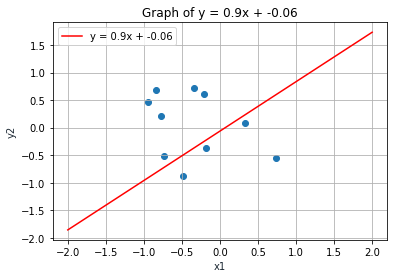

In [ ]:
va = w[1] / -w[2]
moo = w[0] / -w[2]
label = "y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)
plt.plot(x, y, '-r', label=label)
title = "Graph of y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)
plt.title(title)
plt.xlabel('x1', color='#1C2833')
plt.ylabel('y2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.scatter(x1, x2)
plt.show()

In [ ]:
# Define function that calculates predictions
# input w : weight vector chracterising perceptron model : of shape (3,1)
# input X_ext : data matrix X, extended by a row of ones : of shape (3,m)
# return predictions : sign(w.transpose * x) : of shape (1,m)


def predict(w, X_ext):

    mult = np.dot(np.transpose(w),X_ext)
    predictions = np.sign(mult)
    return predictions

In [ ]:
m = 10

# Generate m random data points. X has shape (2,m)
X = generate_points(m)
# add a row of ones. X_ext has shape (3,m)
X_ext = np.vstack((np.ones((1,X.shape[1])), X))

# Generate random boundary. w has shape (3,1)
w = random_boundary()


In [ ]:
df = pd.DataFrame(X_ext,index=['ek','x1','x2'])
df

,0,1,2,3,4,5,6,7,8,9
ek,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
x1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675
x2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449


In [ ]:
pd.DataFrame(w, index=['w0','w1','w2'])

,0
w0,-0.062111
w1,0.897140
w2,-1.000000


In [ ]:
# Generate labels. Y has shape (1,m)
Y = predict(w, X_ext)
Y.shape

(1, 10)

In [ ]:
X_mult = df.append(pd.DataFrame(Y), ignore_index=True)
X_mult.index = ['ek', 'x1', 'x2','Label']
X_mult

,0,1,2,3,4,5,6,7,8,9
ek,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
x1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675
x2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449
Label,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000


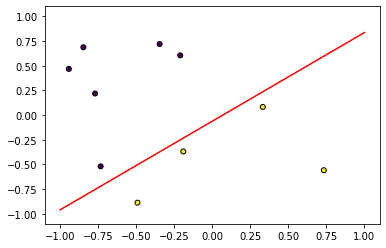

In [ ]:
# Visualize the data and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

# the decision boundary chracterized by vector w
xp = np.array((-1,1))
yp = -(w[1]/w[2]) * xp - (w[0]/w[2])

plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot(xp, yp, "r-") # decision boundary
plt.show()

In [ ]:
# Example of a point
index = 3
print("Point #" + str(index) + " is " + str(X[:,index]))
print("Class #" + str(index) + " is " + str(Y[0,index]))

# For integer inputs, if array value is greater than 0 it 
# returns 1, if array value is less than 0 it returns -1, 
# and if array value 0 it returns 0.

Point #3 is [0.33218043 0.08232442]
Class #3 is 1.0


## **3 - Training**

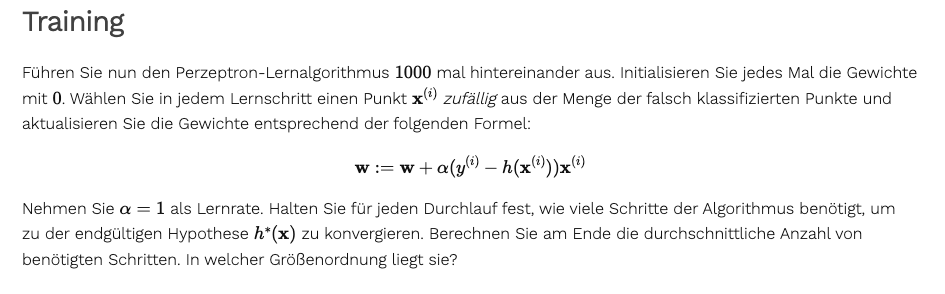

In [ ]:
# Define function for weight update

# input w : current weight vector with shape (3,1)
# input x : misclassified data point (should have shape (3,1))
# input y : label of data point x (scalar)

# return new_w : updated weight vector
def weight_update(w, x, y, learning_rate):

    mult = np.dot(np.transpose(w),x)
    prediction = np.sign(mult)

    new_w = w + learning_rate*(y-prediction)*x
    
    new_w = np.reshape(new_w, (3,1))
    return new_w

In [ ]:
m = 10

# Generate m random data points. X has shape (2,m)
X = generate_points(m)
# add a row of ones. X_ext has shape (3,m)
X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w = [0,0,0]
w = np.reshape(w, (3,1))

# Generate labels. Y has shape (1,m)
Y = predict(w, X_ext)

In [ ]:
# Dataset
df = pd.DataFrame(X_ext,index=['ek', 'x1','x2'])
df

,0,1,2,3,4,5,6,7,8,9
ek,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
x1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675
x2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449


In [ ]:
# Klassifizierung der Punkte nach der Hypothesefunktion
X_sample = df.append(pd.DataFrame(Y), ignore_index=True)
X_sample.index = ['x0', 'x1', 'x2','Label - h(x)',]
X_sample

,0,1,2,3,4,5,6,7,8,9
x0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
x1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675
x2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449
Label - h(x),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Korrekte Klassifizierung der Punkte
w_true = random_boundary()
Y_true = predict(w_true, X_ext)
X_true = df.append(pd.DataFrame(Y_true), ignore_index=True)
X_true.index = ['x0', 'x1', 'x2','True Label',]
X_true

,0,1,2,3,4,5,6,7,8,9
x0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
x1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675
x2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449
True Label,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000


In [ ]:
# Auffinden falsch klassifizierter Punkte
false_klass = np.where(Y != Y_true)[1]
false_klass

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Zufällige Auswahl eines der falsch klassifizierten Punkte
r = random.choice(false_klass)
r

0

In [ ]:
X_ext

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.76989087, -0.73321807, -0.34572189,  0.33218043, -0.94197235,
        -0.21009996, -0.49115775,  0.73329728, -0.1900211 , -0.8466746 ],
       [ 0.21813308, -0.51882076,  0.71827498,  0.08232442,  0.46749659,
         0.60409424, -0.88623013, -0.55794201, -0.36780706,  0.68644939]])

In [ ]:
X_ext[:,r]

array([ 1.        , -0.76989087,  0.21813308])

In [ ]:
m = 10

# Generate m random data points. X has shape (2,m)
X = generate_points(m)
# add a row of ones. X_ext has shape (3,m)
X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w_correct = random_boundary() # Klassifizierung
w_Correct = np.reshape(w_correct, (3,1))

# Generate labels. Y has shape (1,m)
Y = predict(w_correct, X_ext)

In [ ]:
Y[0,9]

-1.0

In [ ]:
# Initialize weight vector w_ with 0. 

w_ = [0,0,0]
w_ = np.reshape(w_, (3,1))
learning_rate = 1
num_iterations = 1000

# initialize array to save number of misclassified points in each iteration
num_misses = np.zeros(num_iterations)

for i in range(num_iterations):
  w_ = [0,0,0]
  w_ = np.reshape(w_, (3,1))
  k = 0 #Scritte um richtige h(x) zu finden
  while True :
    # calculate predictions for all points
    Y_guess = predict(w_, X_ext)

    # identify indices of misclassified points
    false_klass = np.where(Y != Y_guess)[1]


    # calculate and save number of misclassified points
    # break if there are none
    #print(len(false_klass))
    if len(false_klass) == 0:
      num_misses[i] = k
      break
    else :
      k+=1  
    # select random misclassified index
    index = random.choice(false_klass)
    x_new = X_ext[:,index]
    x_new = np.array(x_new)
    x_new = x_new.reshape((3, 1))

    # perform one weight update using datapoint at selected index
    w_ = weight_update(w_,x_new,Y[0,index],learning_rate) 
  #print("######")

In [ ]:
num_misses

array([14.,  6., 12.,  9.,  5., 10.,  7.,  5., 16.,  4.,  6.,  8.,  9.,
        4.,  9.,  3., 18.,  3.,  6.,  6.,  6., 12.,  9., 18.,  6.,  7.,
        5.,  9.,  4.,  6.,  6.,  4., 20.,  4.,  5.,  4.,  6.,  6.,  6.,
       10.,  5., 10.,  8.,  8., 11.,  8.,  5.,  7.,  6.,  8., 11.,  9.,
        5.,  6.,  7.,  8.,  7.,  8.,  4.,  8., 10., 18., 17.,  3., 12.,
        6.,  3.,  9.,  9.,  8., 10.,  9.,  7.,  8.,  8., 10.,  6., 14.,
        6., 10., 13., 11.,  7.,  8., 17.,  7.,  6.,  7., 12.,  9., 13.,
        8.,  9., 12.,  9.,  5.,  5.,  6.,  6., 18.,  5.,  4., 11., 10.,
        9.,  4., 13.,  9.,  5.,  9.,  6., 14.,  6.,  7., 10.,  5., 14.,
        6.,  4.,  7., 17., 11.,  6., 17.,  6.,  5., 11., 12.,  3.,  6.,
        6., 10., 15.,  6.,  9., 10.,  8.,  6., 16.,  7.,  5., 15.,  6.,
        8.,  8.,  9., 12.,  6.,  6.,  6.,  8.,  8.,  8.,  9., 12.,  6.,
        6., 12.,  5.,  5.,  8., 10.,  5., 10.,  6.,  8.,  4.,  6.,  8.,
       14.,  8.,  8.,  8.,  9.,  3.,  8., 10.,  6.,  5.,  4.,  8

In [ ]:
print("Mean : ",np.mean(num_misses))
print("Max : ",max(num_misses))
print("Min : ",min(num_misses))
print("Std : ",np.std(num_misses))

Mean :  8.226
Max :  21.0
Min :  3.0
Std :  3.45151039401593


(array([113., 265., 249., 159.,  30.,  85.,  57.,  25.,  11.,   6.]),
 array([ 3. ,  4.8,  6.6,  8.4, 10.2, 12. , 13.8, 15.6, 17.4, 19.2, 21. ]),
 <a list of 10 Patch objects>)

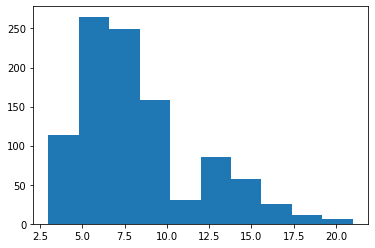

In [ ]:
plt.hist(num_misses)

### tatsaechliche Funktion

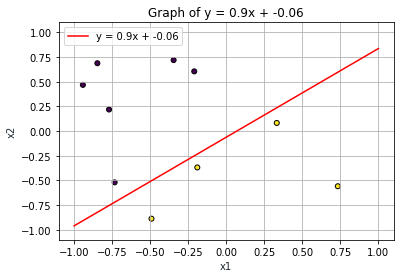

In [ ]:
# Visualize the data and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

# the decision boundary chracterized by vector w
xp = np.array((-1,1))
yp = -(w_correct[1]/w_correct[2]) * xp - (w_correct[0]/w_correct[2])

plt.axis([-1.1, 1.1, -1.1, 1.1])

va = w_correct[1] / -w_correct[2]
moo = w_correct[0] / -w_correct[2]
label = "y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)

plt.plot(xp, yp, "r-",label=label) # decision boundary


title = "Graph of y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)
plt.title(title)
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
w_

array([[ 1.       ],
       [ 3.216002 ],
       [-2.4589798]])

###richtige h*(x)

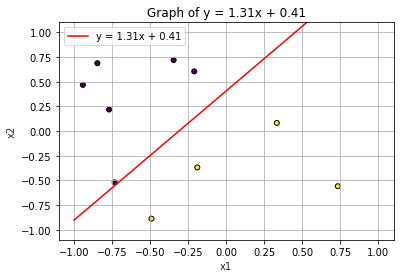

In [ ]:
#richtige h*(x)
# Visualize the data and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

# the decision boundary chracterized by vector w
xp = np.array((-1,1))
yp = -(w_[1]/w_[2]) * xp - (w_[0]/w_[2])

plt.axis([-1.1, 1.1, -1.1, 1.1])

va = w_[1] / -w_[2]
moo = w_[0] / -w_[2]
label = "y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)

plt.plot(xp, yp, "r-",label=label) # decision boundary


title = "Graph of y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)
plt.title(title)
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
w_correct

array([[-0.06211109],
       [ 0.89713954],
       [-1.        ]])

#Experimente

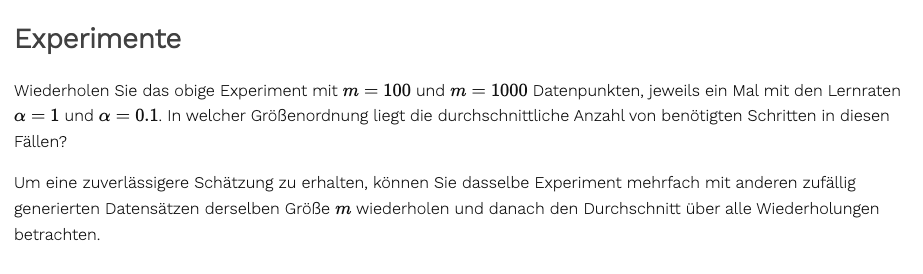



In [ ]:
def experiment(m,learning_rate) :

  # Generate m random data points. X has shape (2,m)
  X = generate_points(m)
  # add a row of ones. X_ext has shape (3,m)
  X_ext = np.vstack((np.ones((1,X.shape[1])), X))

  w_correct = random_boundary()
  w_correct = np.reshape(w_correct, (3,1))

  # Generate labels. Y has shape (1,m)
  Y = predict(w_correct, X_ext)

  # Initialize weight vector w_ with 0. 

  w_ = [0,0,0]
  w_ = np.reshape(w_, (3,1))
  num_iterations = 1000

  # initialize array to save number of misclassified points in each iteration
  num_misses = np.zeros(num_iterations)

  for i in range(num_iterations):
    w_ = [0,0,0]
    w_ = np.reshape(w_, (3,1))
    k = 0 #Scritt
    while True :
      # calculate predictions for all points
      Y_guess = predict(w_, X_ext)

      # identify indices of misclassified points
      false_klass = np.where(Y != Y_guess)[1]


      # calculate and save number of misclassified points
      # break if there are none
      #print(len(false_klass))
      if len(false_klass) == 0:
        num_misses[i] = k
        break
      else :
        k+=1  
      # select random misclassified index
      index = random.choice(false_klass)
      x_new = X_ext[:,index]
      x_new = np.array(x_new)
      x_new = x_new.reshape((3, 1))

      # perform one weight update using datapoint at selected index
      w_ = weight_update(w_,x_new,Y[0,index],learning_rate) 
    #print("######")
  return num_misses

### M = 100 and a = 1

In [ ]:
num_misses = experiment(100,1)
num_misses

array([ 73., 150.,  99.,  86., 159., 104.,  86.,  93., 116., 108.,  95.,
       113.,  73., 122.,  95., 123.,  97., 155., 143., 115., 111., 122.,
       119., 106.,  96.,  90., 114., 108., 110., 125., 148.,  81., 117.,
        82., 105., 127.,  85., 106., 109.,  78., 123., 135., 143., 124.,
       106., 126.,  93., 127., 147., 120., 101., 102., 112.,  78., 126.,
       109.,  94., 122., 102.,  94., 102., 144.,  91.,  92., 129., 104.,
       108., 135.,  90., 143.,  84., 128., 110., 142., 116., 116., 114.,
       139., 105., 123.,  75., 114.,  87.,  76.,  90.,  85., 140., 112.,
        81., 100., 119., 113., 113., 129., 104.,  92.,  91., 125., 100.,
        77.,  88., 138., 133., 147., 138., 118., 103.,  95., 112., 149.,
        86., 146., 110.,  72.,  97., 106., 130., 115.,  89., 105., 113.,
       130.,  85., 158., 114.,  79.,  99.,  88., 114.,  76.,  87., 102.,
       112., 142., 152., 129., 142., 121., 121., 132., 111.,  87., 136.,
       130.,  94.,  93., 109.,  95.,  86., 125.,  9

In [ ]:
print("Mean : ",np.mean(num_misses))
print("Max : ",max(num_misses))
print("Min : ",min(num_misses))
print("Std : ",np.std(num_misses))

Mean :  109.059
Max :  198.0
Min :  68.0
Std :  19.393182281410134


(array([ 44., 198., 243., 229., 160.,  88.,  29.,   7.,   1.,   1.]),
 array([ 68.,  81.,  94., 107., 120., 133., 146., 159., 172., 185., 198.]),
 <a list of 10 Patch objects>)

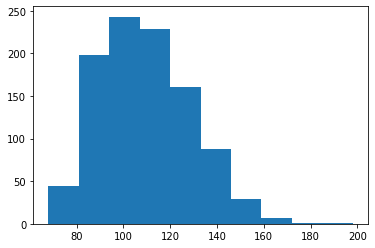

In [ ]:
plt.hist(num_misses)

### M = 100 and a = 0.1

In [ ]:
num_misses = experiment(100,0.1)
num_misses

array([ 73., 150.,  99.,  86., 159., 104.,  86.,  93., 116., 108.,  95.,
       113.,  73., 122.,  95., 123.,  97., 155., 143., 115., 111., 122.,
       119., 106.,  96.,  90., 114., 108., 110., 125., 148.,  81., 117.,
        82., 105., 127.,  85., 106., 109.,  78., 123., 135., 143., 124.,
       106., 126.,  93., 127., 147., 120., 101., 102., 112.,  78., 126.,
       109.,  94., 122., 102.,  94., 102., 144.,  91.,  92., 129., 104.,
       108., 135.,  90., 143.,  84., 128., 110., 142., 116., 116., 114.,
       139., 105., 123.,  75., 114.,  87.,  76.,  90.,  85., 140., 112.,
        81., 100., 119., 113., 113., 129., 104.,  92.,  91., 125., 100.,
        77.,  88., 138., 133., 147., 138., 118., 103.,  95., 112., 149.,
        86., 146., 110.,  72.,  97., 106., 130., 115.,  89., 105., 113.,
       130.,  85., 158., 114.,  79.,  99.,  88., 114.,  76.,  87., 102.,
       112., 142., 152., 129., 142., 121., 121., 132., 111.,  87., 136.,
       130.,  94.,  93., 109.,  95.,  86., 125.,  9

In [ ]:
print("Mean : ",np.mean(num_misses))
print("Max : ",max(num_misses))
print("Min : ",min(num_misses))
print("Std : ",np.std(num_misses))

Mean :  109.059
Max :  198.0
Min :  68.0
Std :  19.393182281410134


(array([ 44., 198., 243., 229., 160.,  88.,  29.,   7.,   1.,   1.]),
 array([ 68.,  81.,  94., 107., 120., 133., 146., 159., 172., 185., 198.]),
 <a list of 10 Patch objects>)

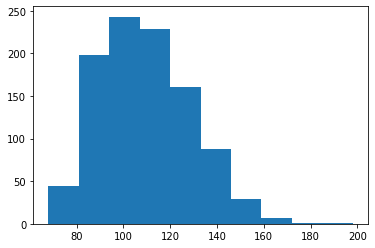

In [ ]:
plt.hist(num_misses)

### M = 1000 and a = 1

In [ ]:
num_misses = experiment(1000,1)
num_misses

array([1054., 1015.,  158.,  139., 1197.,  110.,  137.,  141., 1043.,
        108., 1069., 1088., 1108., 1138.,  149.,  151., 1104., 1071.,
        120.,  120.,  139., 1126., 1053.,  996., 1089., 1096., 1084.,
        124.,  127., 1091., 1041., 1026.,  174., 1103.,  152.,  995.,
       1091., 1065.,  128., 1079., 1030.,  121., 1096.,  148.,  995.,
        127., 1039., 1105.,  184., 1047.,  121., 1098., 1044.,  161.,
       1006., 1096., 1050., 1010., 1073.,  160., 1101., 1040.,  111.,
       1051., 1121.,  125., 1070., 1162.,  125., 1122., 1064.,  145.,
       1116., 1085., 1042.,  125.,  135., 1148.,  109., 1068.,  139.,
       1084.,  162.,  133., 1055.,  141.,  135., 1038.,  160.,  120.,
       1052., 1068.,  137., 1121., 1128.,  116.,  133.,  142., 1146.,
       1017.,  136.,  155.,  153., 1102., 1132., 1076., 1058.,  123.,
        118.,  166., 1021., 1034., 1075.,  131.,  145.,  123.,  166.,
       1074., 1084.,  135.,  168.,  119.,  125., 1098., 1046.,  129.,
        124., 1041.,

In [ ]:
print("Mean : ",np.mean(num_misses))
print("Max : ",max(num_misses))
print("Min : ",min(num_misses))
print("Std : ",np.std(num_misses))

Mean :  666.277
Max :  1248.0
Min :  100.0
Std :  467.3935646444012


(array([439.,   0.,   0.,   0.,   0.,   0.,   0.,  41., 465.,  55.]),
 array([ 100. ,  214.8,  329.6,  444.4,  559.2,  674. ,  788.8,  903.6,
        1018.4, 1133.2, 1248. ]),
 <a list of 10 Patch objects>)

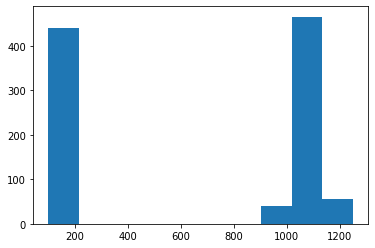

In [ ]:
plt.hist(num_misses)

### M = 1000 and a = 0.1


In [ ]:
num_misses = experiment(1000,0.1)
num_misses

array([1054., 1015.,  158.,  139., 1197.,  110.,  137.,  141., 1043.,
        108., 1069., 1088., 1108., 1138.,  149.,  151., 1104., 1071.,
        120.,  120.,  139., 1126., 1053.,  996., 1089., 1096., 1084.,
        124.,  127., 1091., 1041., 1026.,  174., 1103.,  152.,  995.,
       1091., 1065.,  128., 1079., 1030.,  121., 1096.,  148.,  995.,
        127., 1039., 1105.,  184., 1047.,  121., 1098., 1044.,  161.,
       1006., 1096., 1050., 1010., 1073.,  160., 1101., 1040.,  111.,
       1051., 1121.,  125., 1070., 1162.,  125., 1122., 1064.,  145.,
       1116., 1085., 1042.,  125.,  135., 1148.,  109., 1068.,  139.,
       1084.,  162.,  133., 1055.,  141.,  135., 1038.,  160.,  120.,
       1052., 1068.,  137., 1121., 1128.,  116.,  133.,  142., 1146.,
       1017.,  136.,  155.,  153., 1102., 1132., 1076., 1058.,  123.,
        118.,  166., 1021., 1034., 1075.,  131.,  145.,  123.,  166.,
       1074., 1084.,  135.,  168.,  119.,  125., 1098., 1046.,  129.,
        124., 1041.,

In [ ]:
print("Mean : ",np.mean(num_misses))
print("Max : ",max(num_misses))
print("Min : ",min(num_misses))
print("Std : ",np.std(num_misses))

Mean :  666.277
Max :  1248.0
Min :  100.0
Std :  467.3935646444012


(array([439.,   0.,   0.,   0.,   0.,   0.,   0.,  41., 465.,  55.]),
 array([ 100. ,  214.8,  329.6,  444.4,  559.2,  674. ,  788.8,  903.6,
        1018.4, 1133.2, 1248. ]),
 <a list of 10 Patch objects>)

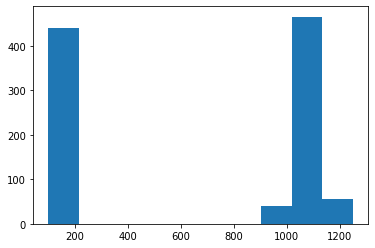

In [ ]:
plt.hist(num_misses)

### Entdeckung :

There is no need for a learning rate in the perceptron algorithm. This is because multiplying the update by any constant simply rescales the weights but never changes the sign of the prediction.

### Visualisierung

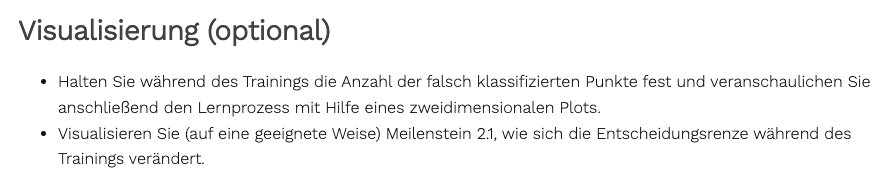

In [ ]:
m = 10

# Generate m random data points. X has shape (2,m)
X = generate_points(m)
# add a row of ones. X_ext has shape (3,m)
X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w_correct = random_boundary()
w_Correct = np.reshape(w_correct, (3,1))

# Generate labels. Y has shape (1,m)
Y = predict(w_correct, X_ext)

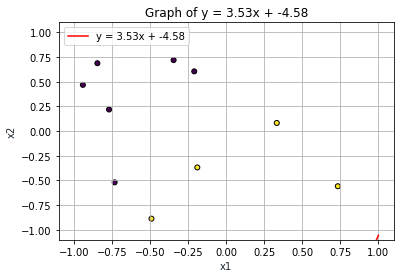

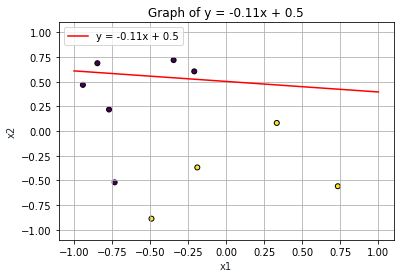

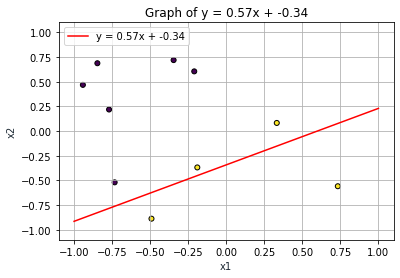

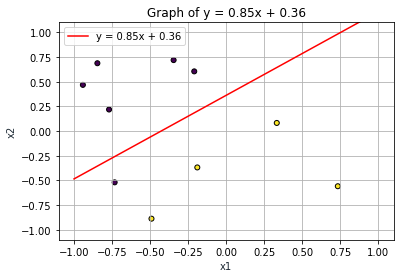

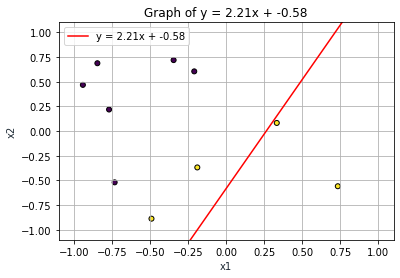

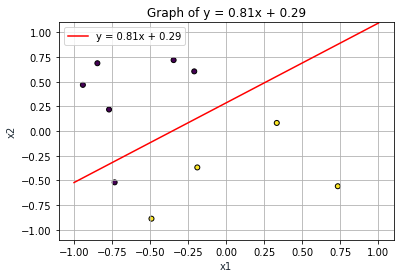

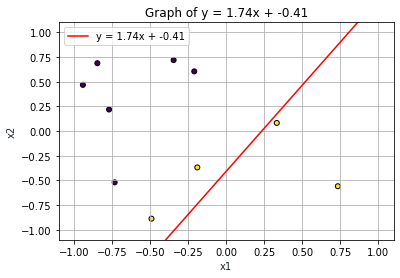

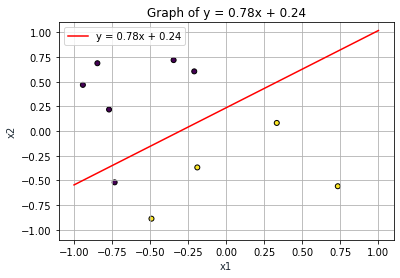

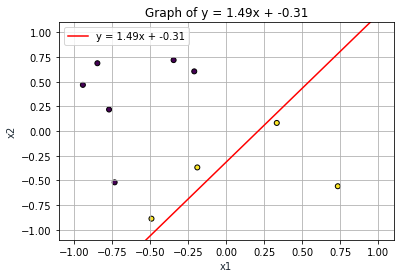

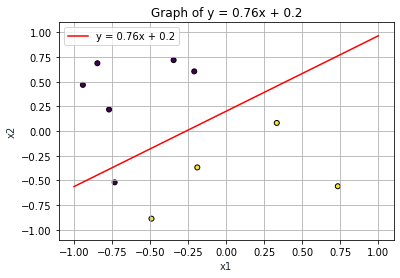

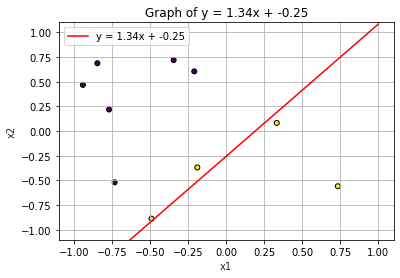

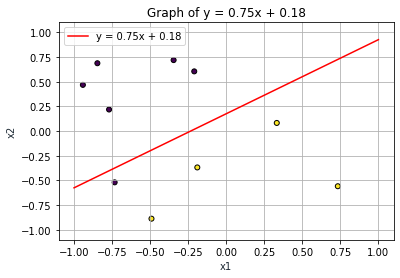

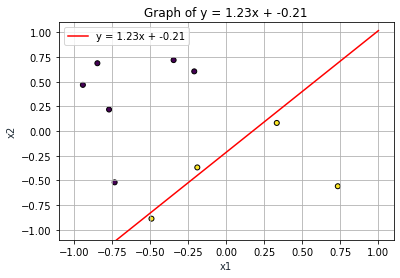

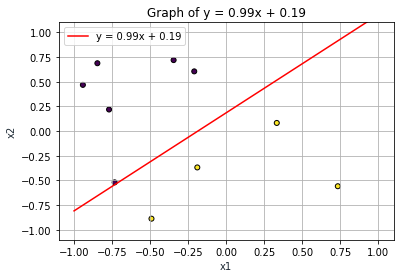

[10, 4, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0]
Ende
######
######
######
######


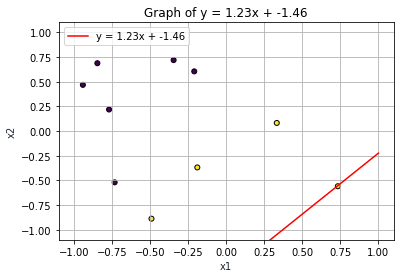

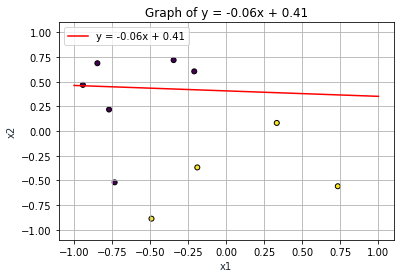

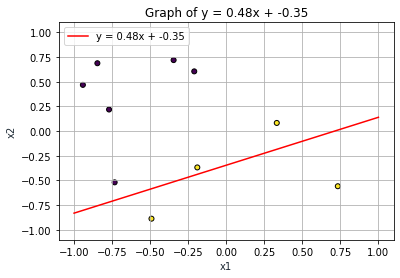

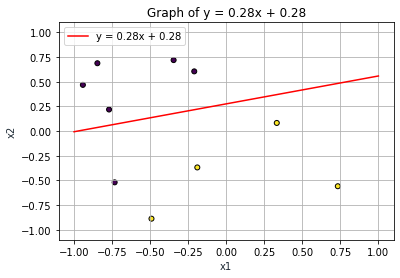

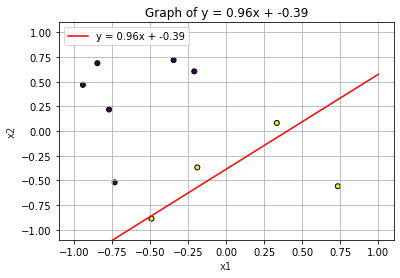

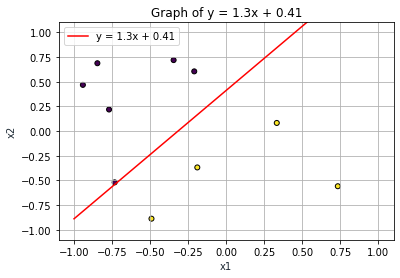

[10, 3, 2, 2, 1, 2, 0]
Ende
######
######
######
######


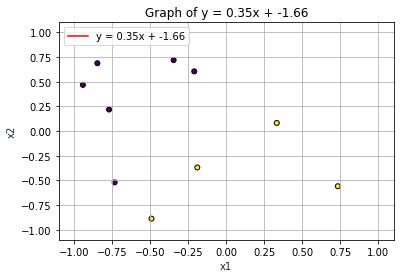

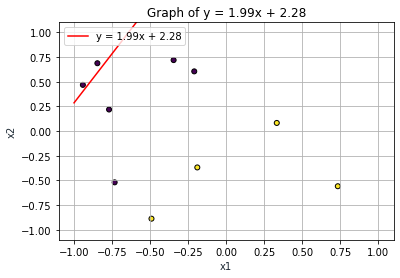

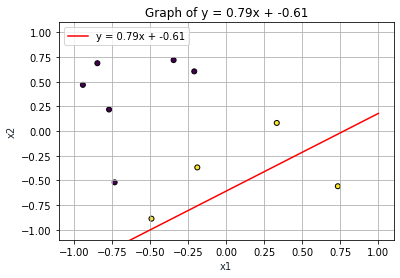

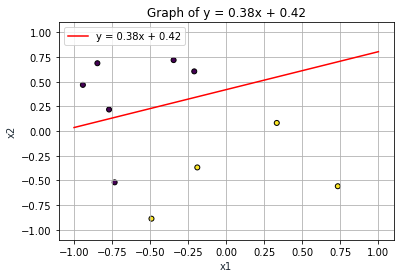

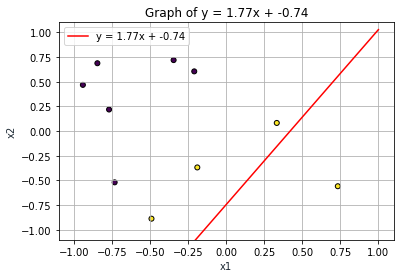

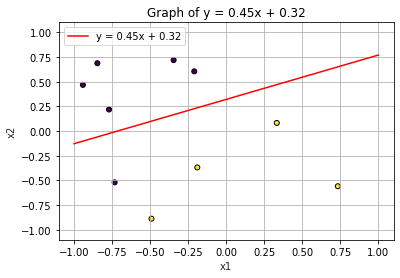

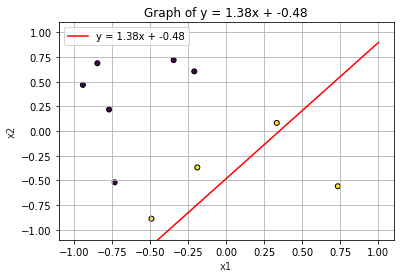

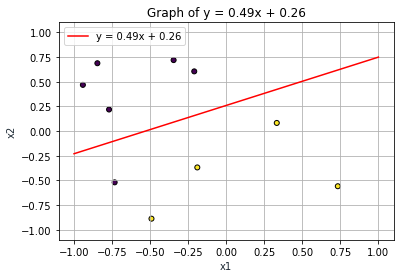

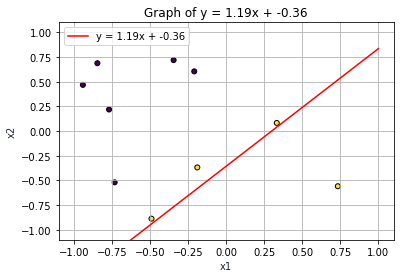

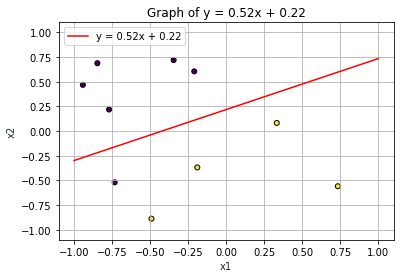

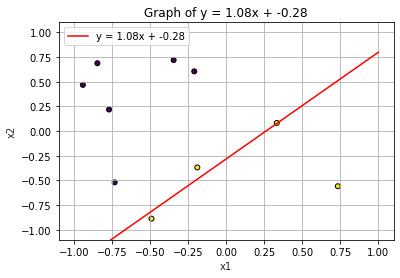

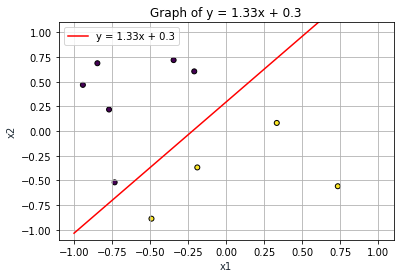

[10, 4, 4, 3, 1, 3, 1, 3, 1, 3, 1, 2, 0]
Ende
######
######
######
######


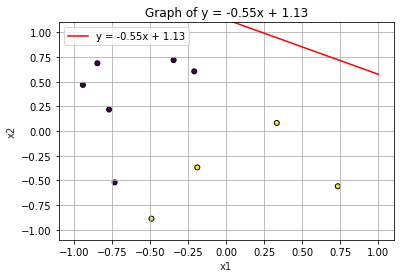

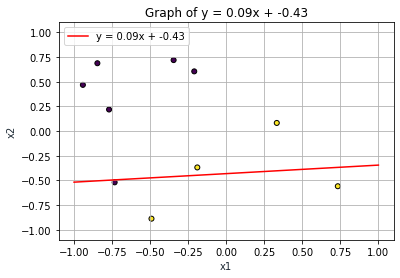

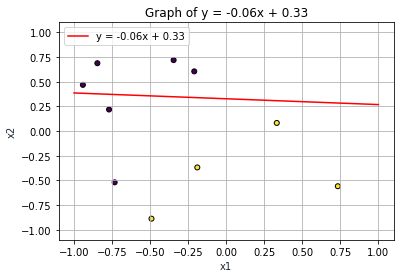

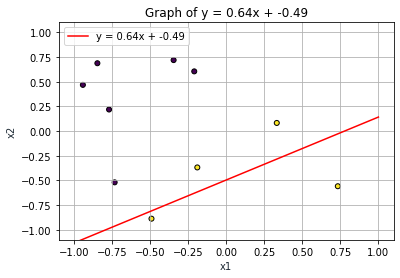

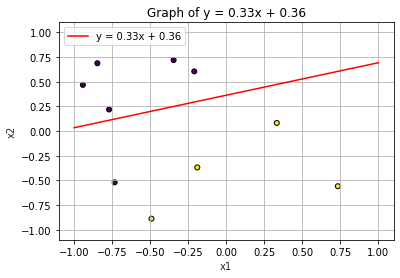

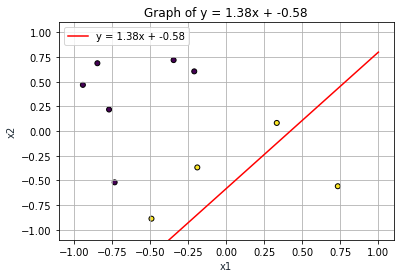

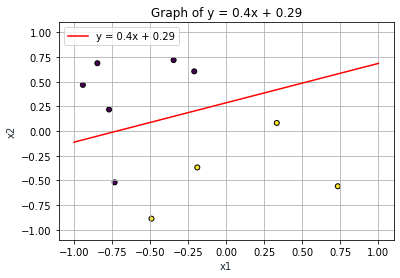

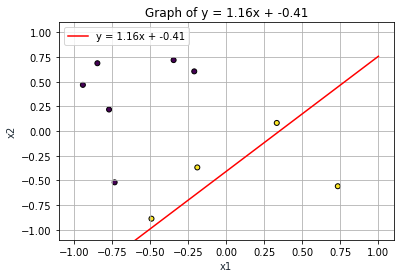

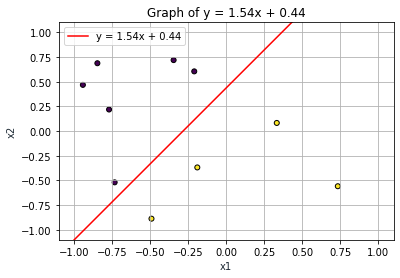

[10, 6, 3, 2, 2, 1, 3, 1, 3, 0]
Ende
######
######
######
######


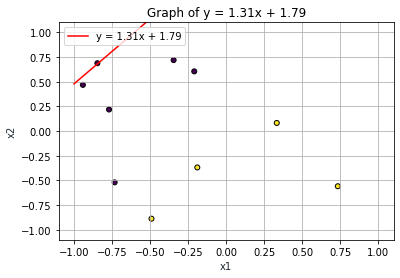

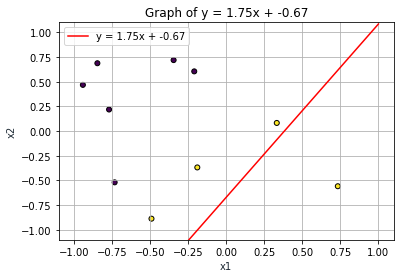

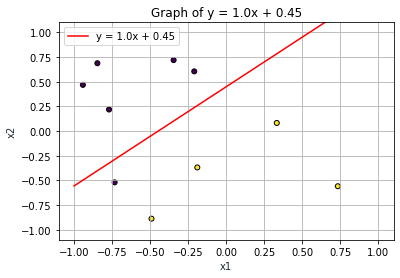

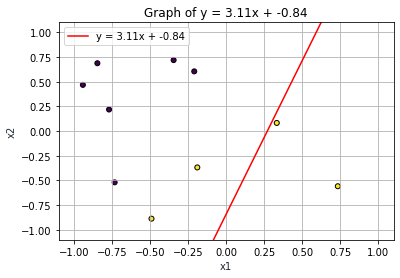

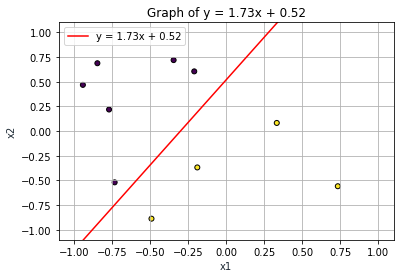

[10, 5, 3, 1, 2, 0]
Ende
######
######
######
######


In [ ]:
# Initialize weight vector w_ with 0. 

w_ = [0,0,0]
w_ = np.reshape(w_, (3,1))
learning_rate = 1
num_iterations = 5

# initialize array to save number of misclassified points in each iteration
num_misses = np.zeros(num_iterations)
false = []

for i in range(num_iterations):
  a = []
  w_ = [0,0,0]
  w_ = np.reshape(w_, (3,1))
  k = 0 #Scritt
  while True :
    # calculate predictions for all points
    Y_guess = predict(w_, X_ext)

    # identify indices of misclassified points
    false_klass = np.where(Y != Y_guess)[1]


    # calculate and save number of misclassified points
    # break if there are none
    #print(len(false_klass))
    a.append(len(false_klass))
    if len(false_klass) == 0:
      print(a)
      false.append(a)
      #print(false)
      num_misses[i] = k
      break
    else :
      k+=1  
    # select random misclassified index
    index = random.choice(false_klass)
    x_new = X_ext[:,index]
    x_new = np.array(x_new)
    x_new = x_new.reshape((3, 1))

    # perform one weight update using datapoint at selected index
    w_ = weight_update(w_,x_new,Y[0,index],learning_rate) 
    
    # Visualize the data and the decision boundary
    fig, ax = plt.subplots()
    ax.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

    # the decision boundary chracterized by vector w
    xp = np.array((-1,1))
    yp = -(w_[1]/w_[2]) * xp - (w_[0]/w_[2])

    plt.axis([-1.1, 1.1, -1.1, 1.1])

    va = w_[1] / -w_[2]
    moo = w_[0] / -w_[2]
    label = "y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)

    plt.plot(xp, yp, "r-",label=label) # decision boundary


    title = "Graph of y = " + round(va[0],2).astype(str) + "x + " + round(moo[0],2).astype(str)
    plt.title(title)
    plt.xlabel('x1', color='#1C2833')
    plt.ylabel('x2', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
  
  print("Ende")
  print("######")
  print("######")
  print("######")
  print("######")

In [ ]:
false

[[10, 4, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0],
 [10, 3, 2, 2, 1, 2, 0],
 [10, 4, 4, 3, 1, 3, 1, 3, 1, 3, 1, 2, 0],
 [10, 6, 3, 2, 2, 1, 3, 1, 3, 0],
 [10, 5, 3, 1, 2, 0]]

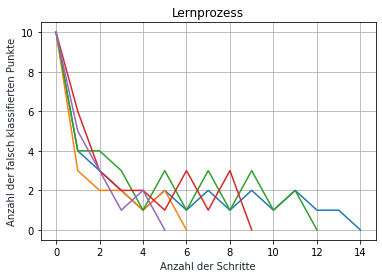

In [ ]:
for el in false : 
  plt.plot(el)


plt.title("Lernprozess")
plt.xlabel('Anzahl der Schritte', color='#1C2833')
plt.ylabel('Anzahl der falsch klassifierten Punkte', color='#1C2833')
plt.grid()